In [1]:
from matplotlib import pyplot as plt
import numpy as np
from netCDF4 import Dataset
import netCDF4
import cartopy.crs as ccrs
import cartopy
import matplotlib.path as mpath
import pandas as pd
from os import listdir
from os.path import isfile, join
import scipy.io
import h5py
import re
import os
from datetime import timedelta
import datetime
from scipy import interpolate
import pickle
import gsw

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
MONTHS=[x.upper() for x in months]
colors=['blue','green','red']
titles=['Aidjex','SHEBA','ITP']


SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 22
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
def plotProfile(monAvg,monStd,color='red',labelMean='Mean',labelStd='1 std',title=None,xlabel='Temperature (°C)',
                ylabel='Depth (m)',xlim=None, ylim=None):
    fig, axs = plt.subplots(1, 12, figsize=(20,8),sharey=True,sharex=True)
    plotInd=8
    for monthInd in range(12):
        axs[plotInd].plot(monAvg[monthInd],interpDepth,color=color,label=labelMean)
        axs[plotInd].fill_betweenx(interpDepth,monAvg[monthInd]-monStd[monthInd],monAvg[monthInd]+monStd[monthInd],color=color,label=labelStd, alpha=0.3)
        axs[plotInd].set_title(months[monthInd],fontsize=16)
        handles, labels = axs[plotInd].get_legend_handles_labels()
        if plotInd !=11:
            plotInd+=1
        else:
            plotInd=0
    plt.xlim(xlim)
    plt.gca().invert_yaxis()
    plt.ylim(ylim)
    fig.legend(handles, labels,loc='lower center',bbox_to_anchor=(0.6,0.015),ncol=2) 
    fig.text(0.5, 0.04, xlabel, ha='center',fontsize=18)
    fig.text(0.08, 0.5, ylabel, va='center', rotation='vertical',fontsize=18)
    fig.suptitle(title)


# sheba

In [165]:
#load data

#Preliminary" Ice Camp GPS, from Miles McPhee
sheba_PosVel_IceCamp= Dataset('/Users/juliettelavoie/Documents/Master/Data/SHEBA/SHEBA_PosVel_IceCamp.nc','r')
sheba_CTD_IceCamp= Dataset('/Users/juliettelavoie/Documents/Master/Data/SHEBA/SHEBA_CTD_IceCamp.nc','r')

#"Final" Ship position and Velocity from Richard Moritz, raw version :
sheba_PosVel_ShipRaw = Dataset('/Users/juliettelavoie/Documents/Master/Data/SHEBA/SHEBA_PosVel_Ship_Raw.nc','r')
#and interpolated (I believe to an hourly frequency) version :
sheba_PosVel_ShipSpline= Dataset('/Users/juliettelavoie/Documents/Master/Data/SHEBA/SHEBA_PosVel_Ship_Spline.nc','r')

sT=sheba_CTD_IceCamp['Temperature'][:]
sS=sheba_CTD_IceCamp['Salinity'][:]
sZ=sheba_CTD_IceCamp['Z'][:]
#issssue with lon lat, not on the same time as CTD
#sLon=sheba_PosVel_IceCamp['Longitude'][:]
#sLat=sheba_PosVel_IceCamp['Latitude'][:]
sTime=sheba_CTD_IceCamp['time']
sTime_convert = netCDF4.num2date(sTime[:], sTime.units, sTime.calendar)
syearday=sheba_CTD_IceCamp['yearday'][:]
sRemove=[1380,3944,3946,3949,3951,3983,8397,1380,3946,3949,3980,3983,5676]

sProfiles=[]    
for i in range(sT.shape[1]):
    if i not in sRemove:
        #check if there is a non mask data
        if sum(sT[:,i].mask)==151 or sum(sS[:,i].mask)==151 :
            #print('empty')
            a=1
        else:
            #check that it starts above 6m
            firstTind=next(i for i,x in enumerate(sT[:,i]) if x!='--')
            firstSind=next(i for i,x in enumerate(sS[:,i]) if x!='--')
            if np.abs(sZ[firstTind])<=6 and np.abs(sZ[firstSind])<=6:
                #check that there is no nan after it starts
                if sum(sT[firstTind:,i].mask)==0 and sum(sS[firstSind:,i].mask)==0 :
                #print(sum(sT[firstTind:,i].mask))
                #if True:
                    dic={'Z':sZ,'Temperature':sT[:,i].data,'Salinity':sS[:,i].data,'datetime':sTime_convert[i],
                         'month':sTime_convert[i].month,'day':sTime_convert[i].day,'year':sTime_convert[i].year
                        ,'yearday':syearday[i]}
                    sProfiles.append(dic)

print(len(sProfiles))    

empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empt

# aidjex

In [173]:
#profiles to remove because not enough or corrupted data points
ajRemove=['BigBear_531','BigBear_549','BigBear_547','BigBear_545','BigBear_246','BigBear_247','BigBear_248',
          'BigBear_249','BigBear_250','BigBear_251','BigBear_252','BigBear_253','BigBear_254','BluFox_88',
          'BluFox_198','BluFox_199','.DS_Store','Snowbird443','BlueFox_094','BlueFox_308','BlueFox_310',
         'BigBear_535','BigBear_543','BigBear_537','BigBear_539','BigBear_541']

apath='/Users/juliettelavoie/Documents/Master/Data/AIDJEX/'
ajfiles = [f for f in listdir(apath) if isfile(join(apath, f))if f not in ajRemove]
ajProfiles=[]
for f in ajfiles:
    with open(apath+f) as openf:
        first_line = openf.readline()
        second_line= openf.readline()

    camp=f[:8]
    if camp[-1]=='_':
        camp=camp[:-1]
    dic={'camp':camp,'file':f} 
    dic['lat']=float(second_line[11:18])
    dic['lon']=float(second_line[31:40])%360
    
    result = re.search('/(.*)/', first_line)
    letterMon=result.group(1)
    month=(MONTHS.index(letterMon))+1
    dic['month']=int(month)
    if first_line[25]==';':
        dic['day']=int(first_line[27:29])
        dic['year']=int(first_line[34:38])
        dic['datetime']=datetime.date(int(first_line[34:38]),month,int(first_line[27:29]))
    else:
        dic['day']=int(first_line[26:28])
        dic['year']=int(first_line[33:37])
        dic['datetime']=datetime.date(int(first_line[33:37]),month,int(first_line[26:28]))

    
    read=pd.read_csv(apath+f,skiprows=4,names=['Depth','Temp','Sal'] ,skipinitialspace=True,delimiter='    ')
    dic['Depth']=read['Depth']
    dic['Temp']=read['Temp']
    dic['Sal']=read['Sal']
    
    #check if first data is above 9m
    firstTind=next(i for i,x in enumerate(dic['Temp']) if not np.isnan(x))
    firstSind=next(i for i,x in enumerate(dic['Sal']) if not np.isnan(x))
    #check if last data is below 491m
    lastDepth=dic['Depth'][len(dic['Depth'])-1]
    if dic['Depth'][firstTind]<=10 and dic['Depth'][firstSind]<=10 and lastDepth>=490:
        ajProfiles.append(dic)




/Users/juliettelavoie/anaconda3/envs/ice/lib/python3.7/site-packages/ipykernel_launcher.py:35: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


# itp

In [51]:
#all itps

ipath='/Users/juliettelavoie/Documents/Master/Data/ITP/'
iDir=[x[0]+'/' for x in os.walk(ipath) if (x[0][-5:]=='final' and x[0][-7:-4]!='35f' and x[0][-7:-4]!='64f')]
iDir.sort()
iDir =iDir[1:]

itpProfiles=[]
for directory in iDir:
    print(directory)
    ifiles = [f for f in listdir(directory) if isfile(join(directory, f)) if f[-11:-8]=='grd']
    ifiles.sort()
    
    result = re.search('itp(.*)final', directory)
    num=result.group(1)
    
    for f in ifiles[:]:
        ofile = open(directory+f)
        numline = len(ofile.readlines())
        if numline >6:
            with open(directory+f) as openf:
                first_line = openf.readline()
                second_line= openf.readline()
            lat=float(second_line[28:35])
            lon=float(second_line[17:26])
            #verify if in canada bassin
            if 72<=lat<=80 and -155<=lon<=-130:
                #verify sal and temp are not NaNs
                itp1=pd.read_csv(directory+f,skiprows=2,engine='python',
                                 usecols=['%pressure(dbar)', 'temperature(C)', 'salinity'] ,
                                 delim_whitespace=True, skipinitialspace=True,skipfooter=1)

                numOfNansS=np.count_nonzero(np.isnan(itp1['salinity']))
                lengthS=len(itp1['salinity'])
                numOfNansT=np.count_nonzero(np.isnan(itp1['temperature(C)']))
                lengthT=len(itp1['temperature(C)'])
                if numOfNansS<lengthS and numOfNansT<lengthT:
                    #creat dic for this profiles
                    dic={'itp':num} # add itp number

                    #add grd number
                    result = re.search('grd(.*).dat', f)
                    grd=result.group(1)
                    dic['grd']=grd

                    #add lon(put in 0,360 format) and lat
                    dic['lon']=lon%360
                    dic['lat']=lat

                    #transform decimal day in datetime
                    decimalDay=float(second_line[6:15])
                    year=int(second_line[:4])
                    Jan1=datetime.date(year, 1, 1)
                    delta=timedelta(days=decimalDay)
                    date=Jan1+delta

                    dic['year']=year
                    dic['month']=date.month
                    dic['day']=date.day
                    dic['decimalDay']=decimalDay
                    dic['datetime']=date
                    dic['%pressure(dbar)']=itp1['%pressure(dbar)']
                    dic['temperature(C)']=itp1['temperature(C)']
                    dic['salinity']=itp1['salinity']
                    depth=gsw.z_from_p(dic['%pressure(dbar)'], dic['lat'])
                    dic['Depth']=np.abs(depth)
                    
                    #check if first data is above 12dbar
                    firstTind=next(i for i,x in enumerate(dic['temperature(C)']) if not np.isnan(x))
                    firstSind=next(i for i,x in enumerate(dic['salinity']) if not np.isnan(x))
                    #print(firstTind,firstSind,dic['Depth'][firstTind],dic['Depth'][firstSind])
                    
                    #check if last data is below 741m
                    lastTind=dic['temperature(C)'].last_valid_index()
                    lastSind=dic['salinity'].last_valid_index()
                    #print(dic['Depth'][lastTind],dic['Depth'][lastSind])
                    if dic['Depth'][firstTind]<=10 and dic['Depth'][firstSind]<=10 and dic['Depth'][lastTind]>=490 and dic['Depth'][lastSind]>=490:
                        itpProfiles.append(dic)    

/Users/juliettelavoie/Documents/Master/Data/ITP/itp101final/
/Users/juliettelavoie/Documents/Master/Data/ITP/itp10final/
/Users/juliettelavoie/Documents/Master/Data/ITP/itp11final/
/Users/juliettelavoie/Documents/Master/Data/ITP/itp12final/
/Users/juliettelavoie/Documents/Master/Data/ITP/itp13final/
/Users/juliettelavoie/Documents/Master/Data/ITP/itp14final/
/Users/juliettelavoie/Documents/Master/Data/ITP/itp15final/
/Users/juliettelavoie/Documents/Master/Data/ITP/itp16final/
/Users/juliettelavoie/Documents/Master/Data/ITP/itp17final/
/Users/juliettelavoie/Documents/Master/Data/ITP/itp18final/
/Users/juliettelavoie/Documents/Master/Data/ITP/itp19final/
/Users/juliettelavoie/Documents/Master/Data/ITP/itp1final/
/Users/juliettelavoie/Documents/Master/Data/ITP/itp21final/
/Users/juliettelavoie/Documents/Master/Data/ITP/itp22final/
/Users/juliettelavoie/Documents/Master/Data/ITP/itp23final/
/Users/juliettelavoie/Documents/Master/Data/ITP/itp24final/
/Users/juliettelavoie/Documents/Master/D

# Interpolate on regular grid

In [174]:
#define grid to interpolate to
interpDepth=np.arange(0,500,1)

#interpolate the profiles
for pro in sProfiles:
    f = interpolate.interp1d(np.abs(pro['Z']), pro['Temperature'],bounds_error=False)
    pro['T'] = f(interpDepth)
    f=interpolate.interp1d(np.abs(pro['Z']), pro['Salinity'],bounds_error=False)
    pro['S'] = f(interpDepth)
    pro['D'] = interpDepth
print('s interp!')   

for pro in ajProfiles:
    f = interpolate.interp1d(np.abs(pro['Depth']), pro['Temp'],bounds_error=False)
    pro['T'] = f(interpDepth)
    f=interpolate.interp1d(np.abs(pro['Depth']), pro['Sal'],bounds_error=False)
    pro['S'] = f(interpDepth)
    pro['D'] = interpDepth
print('aj interp!')

for pro in itpProfiles:
    f = interpolate.interp1d(np.abs(pro['Depth']), pro['temperature(C)'],bounds_error=False)
    pro['T'] = f(interpDepth)
    f=interpolate.interp1d(np.abs(pro['Depth']), pro['salinity'],bounds_error=False)
    pro['S'] = f(interpDepth)
    pro['D'] = interpDepth
print('itp interp!')   

s interp!
aj interp!
itp interp!


In [175]:
profiles=[ajProfiles, sProfiles, itpProfiles]
for d,data in enumerate(profiles):
    print(d,len(data))
    for pro in data:
        a=1
        #print(np.count_nonzero(~np.isnan(pro['T'])))
        #print(np.count_nonzero(~np.isnan(pro['S'])))

0 1153
1 11228
2 15303


# cut edge to have same ylim everywhere
( if not is can bias the mean)

In [183]:
topInd=6
for pro in sProfiles:
    pro['T'][:topInd]=[np.nan]*len(pro['T'][:topInd])
    pro['S'][:topInd]=[np.nan]*len(pro['S'][:topInd])

In [185]:
#print if not right number of data point not nan for each profile
for i,pro in enumerate(sProfiles):
    nanT=np.count_nonzero(~np.isnan(pro['T']))
    nanS=np.count_nonzero(~np.isnan(pro['S']))
    if nanT!=145 or nanT!=145:
        print(i,nanT, nanS)

In [186]:
#replace everything outside the range by nans
ajtopInd=10
ajbottomInd=491
for pro in ajProfiles:
    pro['T'][:ajtopInd]=[np.nan]*len(pro['T'][:ajtopInd])
    pro['T'][ajbottomInd:]=[np.nan]*len(pro['T'][ajbottomInd:])
    pro['S'][:ajtopInd]=[np.nan]*len(pro['S'][:ajtopInd])
    pro['S'][ajbottomInd:]=[np.nan]*len(pro['S'][ajbottomInd:])

In [189]:
#print if not right number of data point not nan for each profile
for i,pro in enumerate(ajProfiles):
    nanT=np.count_nonzero(~np.isnan(pro['T']))
    nanS=np.count_nonzero(~np.isnan(pro['S']))
    if nanT!=481 or nanT!=481:
        print(i,nanT, nanS)

In [190]:
#replace everything outside the range by nans
itptopInd=10
itpbottomInd=491
for pro in itpProfiles:
    pro['T'][:itptopInd]=[np.nan]*len(pro['T'][:itptopInd])
    pro['T'][itpbottomInd:]=[np.nan]*len(pro['T'][itpbottomInd:])
    pro['S'][:itptopInd]=[np.nan]*len(pro['S'][:itptopInd])
    pro['S'][itpbottomInd:]=[np.nan]*len(pro['S'][itpbottomInd:])

In [191]:
#print if not right number of data point not nan for each profile
for i,pro in enumerate(itpProfiles):
    nanT=np.count_nonzero(~np.isnan(pro['T']))
    nanS=np.count_nonzero(~np.isnan(pro['S']))
    if nanT!=481 or nanT!=481:
        print(i,nanT, nanS)

# calculate P, CT, PD, PDz


In [192]:
profiles=[ajProfiles, sProfiles, itpProfiles]
for d,data in enumerate(profiles):
    for pro in data:
        if d==1:
            lat=75# difference at 3rd decimal point for different lat
        else:
            lat=pro['lat']
        pro['P']=gsw.p_from_z([-z for z in pro['D']],lat)
        pro['CT']=gsw.CT_from_t(pro['S'],pro['T'],pro['P'])
        pro['PD']=gsw.density.sigma0(pro['S'], pro['CT'])
        pro['PDz']=np.diff(pro['PD'])/1.0# range in z between each point

# save

In [195]:
with open("saved/sProfiles.txt", "wb") as fp:  
    pickle.dump(sProfiles,fp)
with open("saved/ajProfiles.txt", "wb") as fp:  
    pickle.dump(ajProfiles,fp)
with open("saved/itpProfiles.txt", "wb") as fp:  
    pickle.dump(itpProfiles,fp)

# plot

In [ ]:
with open("saved/sProfiles.txt", "rb") as fp:  
    sProfiles=pickle.load(fp)
print('sloaded!')
with open("saved/ajProfiles.txt", "rb") as fp:  
    ajProfiles=pickle.load(fp)
print('ajloaded!')
with open("saved/itpProfiles.txt", "rb") as fp:  
    itpProfiles=pickle.load(fp)
print('itploaded!')
profiles=[ajProfiles,sProfiles,itpProfiles]
proByMonths=[[[pro for pro in data if pro['month']==m]for m in range(1,13)] for data in profiles]
interpDepth=sProfiles[0]['D']

/Users/juliettelavoie/anaconda3/envs/ice/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/juliettelavoie/anaconda3/envs/ice/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


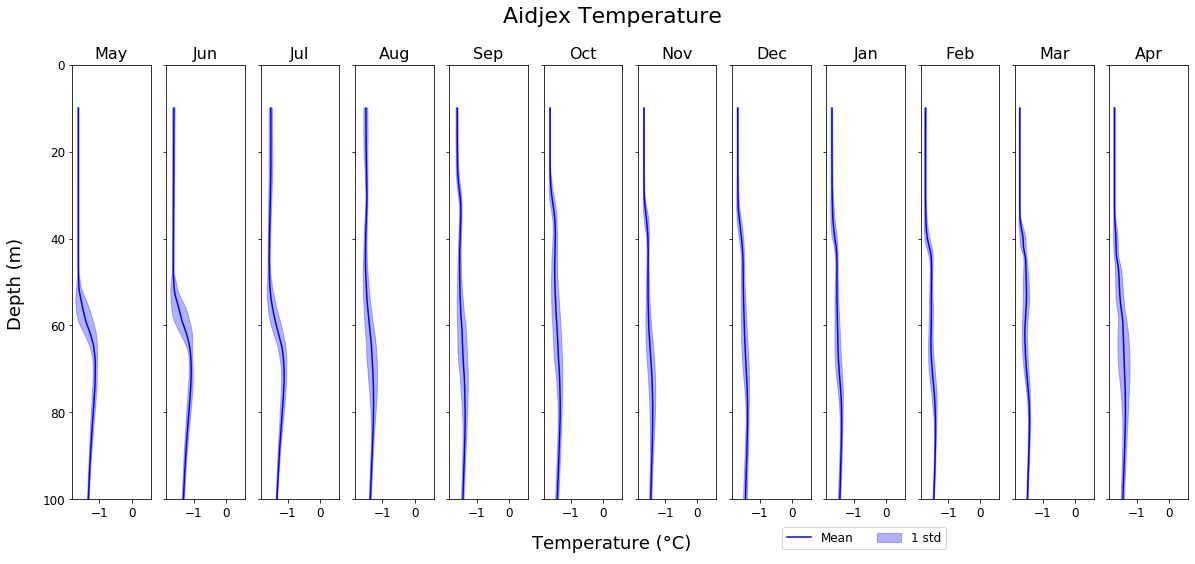

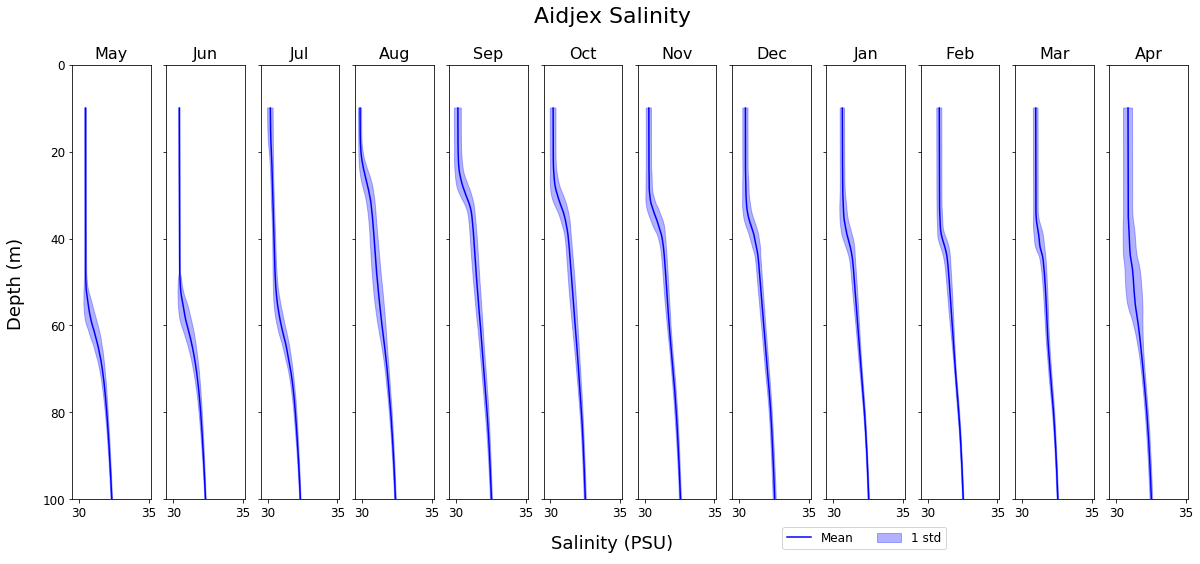

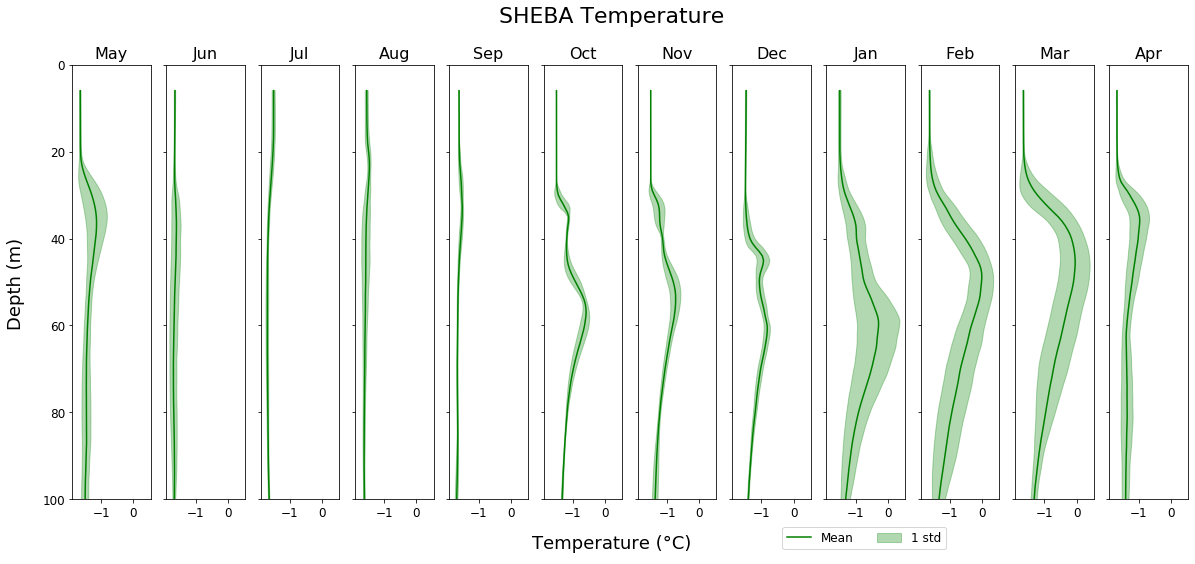

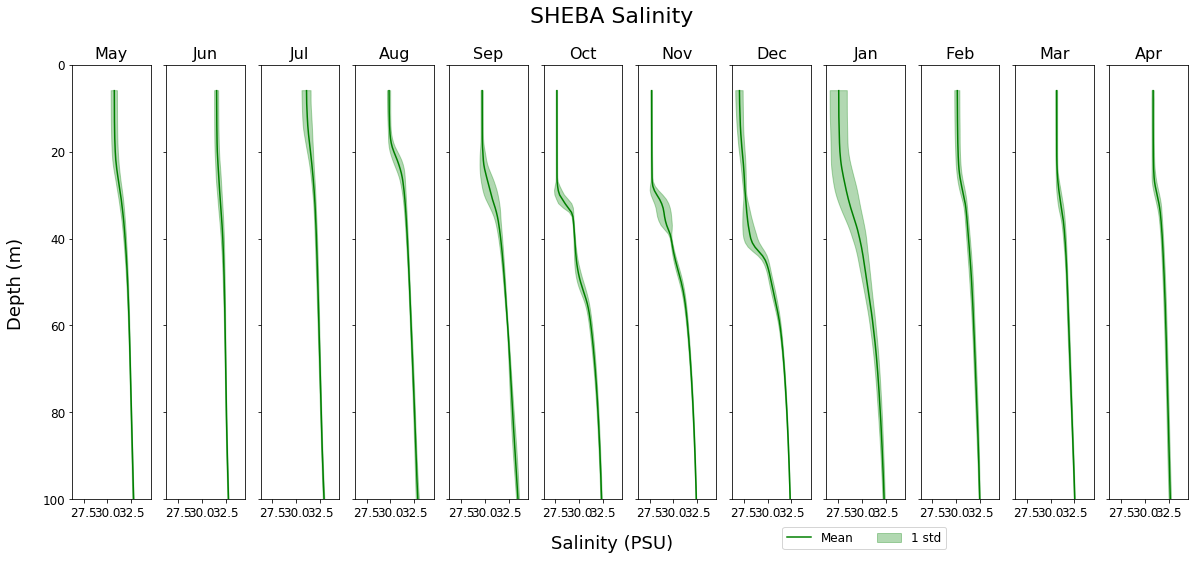

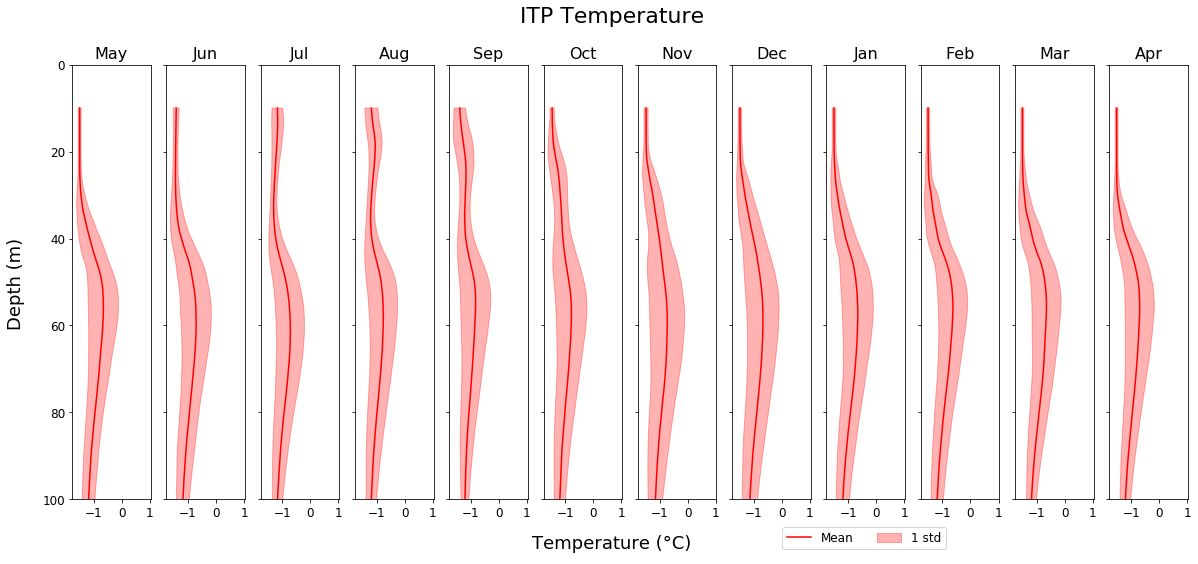

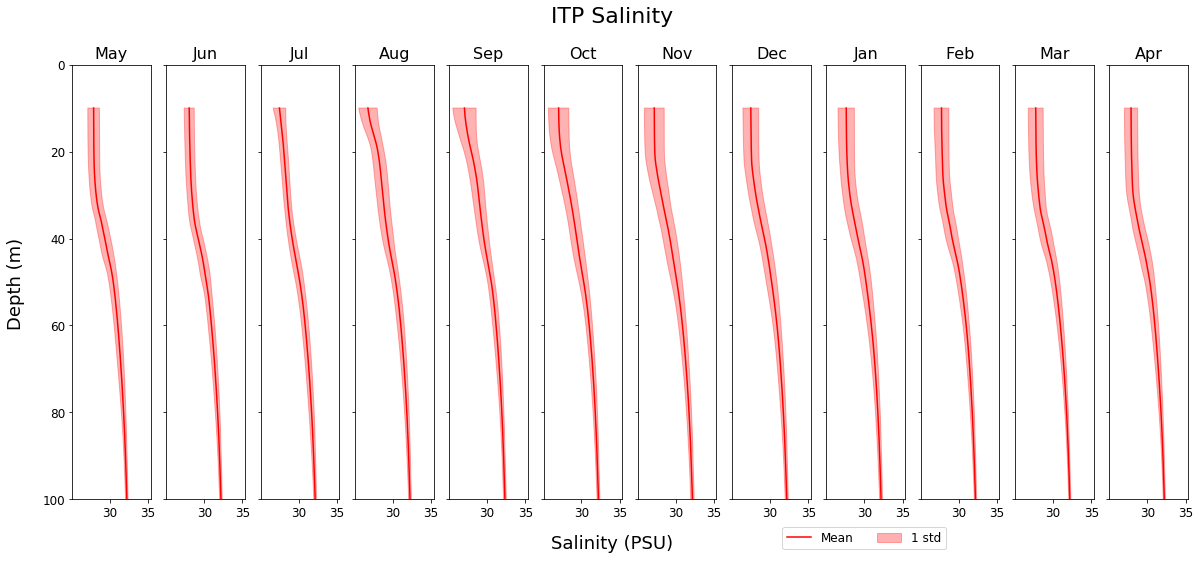

In [199]:
profiles=[ajProfiles, sProfiles, itpProfiles]
for d,data in enumerate(profiles):
    #if d!=0 and d!=2:
    if True:
        TbyMonths=[[pro['T'] for pro in data if pro['month']==m]for m in range(1,13)]
        SbyMonths=[[pro['S'] for pro in data if pro['month']==m]for m in range(1,13)]

        Tavg=[np.nanmean(proM,axis=0) for proM in TbyMonths]
        Tstd=[np.nanstd(proM,axis=0) for proM in TbyMonths]
        Savg=[np.nanmean(proM,axis=0) for proM in SbyMonths]
        Sstd=[np.nanstd(proM,axis=0) for proM in SbyMonths]
        

        plotProfile(Tavg,Tstd,color=colors[d],labelMean='Mean',labelStd='1 std',title=titles[d] +' Temperature',
                    xlim=None,ylim=((100,0)))
        plotProfile(Savg,Sstd,color=colors[d],labelMean='Mean',labelStd='1 std',title=titles[d] + ' Salinity',
                    xlabel='Salinity (PSU)',xlim=None,ylim=((100,0)))